In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten,Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
from keras.datasets import cifar10
(x_train, y_train),(x_test,y_test ) = cifar10.load_data()

170508288/170498071 [==============================] - 12s 0us/step


In [4]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
 x_train.shape,y_train.shape, x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
# images as an array
index = 11
x_train[index]

array([[[142, 149, 152],
        [172, 172, 167],
        [176, 168, 154],
        ...,
        [216, 212, 211],
        [198, 194, 193],
        [205, 202, 200]],

       [[191, 190, 192],
        [196, 192, 190],
        [174, 166, 159],
        ...,
        [229, 222, 220],
        [222, 215, 213],
        [217, 210, 207]],

       [[220, 212, 212],
        [217, 209, 208],
        [192, 183, 182],
        ...,
        [224, 214, 209],
        [225, 214, 210],
        [218, 208, 203]],

       ...,

       [[197, 152, 136],
        [196, 152, 135],
        [201, 156, 140],
        ...,
        [200, 165, 146],
        [199, 165, 146],
        [205, 164, 150]],

       [[196, 157, 139],
        [191, 152, 135],
        [193, 154, 136],
        ...,
        [198, 164, 144],
        [199, 165, 145],
        [201, 161, 146]],

       [[186, 150, 133],
        [182, 147, 130],
        [174, 139, 121],
        ...,
        [158, 124, 105],
        [158, 125, 106],
        [163, 125, 111]]

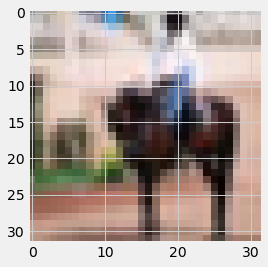

In [7]:
# image as a picture
img = plt.imshow(x_train[index])

In [8]:
#label of image
print(y_train[index])

[7]


In [9]:
# getting image classifications
classification = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#print the image class
print('image class is:-', classification[y_train[index][0]])

# convert label into set of 10 numbers to input into neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

image class is:- horse


In [10]:
# new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
# Print the new label of the image above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [12]:
# Normalise the pixels to the values between zeroes and ones
x_train = x_train / 255
x_test = x_test / 255
x_train[index]

array([[[0.55686275, 0.58431373, 0.59607843],
        [0.6745098 , 0.6745098 , 0.65490196],
        [0.69019608, 0.65882353, 0.60392157],
        ...,
        [0.84705882, 0.83137255, 0.82745098],
        [0.77647059, 0.76078431, 0.75686275],
        [0.80392157, 0.79215686, 0.78431373]],

       [[0.74901961, 0.74509804, 0.75294118],
        [0.76862745, 0.75294118, 0.74509804],
        [0.68235294, 0.65098039, 0.62352941],
        ...,
        [0.89803922, 0.87058824, 0.8627451 ],
        [0.87058824, 0.84313725, 0.83529412],
        [0.85098039, 0.82352941, 0.81176471]],

       [[0.8627451 , 0.83137255, 0.83137255],
        [0.85098039, 0.81960784, 0.81568627],
        [0.75294118, 0.71764706, 0.71372549],
        ...,
        [0.87843137, 0.83921569, 0.81960784],
        [0.88235294, 0.83921569, 0.82352941],
        [0.85490196, 0.81568627, 0.79607843]],

       ...,

       [[0.77254902, 0.59607843, 0.53333333],
        [0.76862745, 0.59607843, 0.52941176],
        [0.78823529, 0

In [13]:
#models architecture
model = Sequential()

# first layer
model.add(Conv2D(32,(5,5), activation='relu',input_shape=(32,32,3)))
# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))
#second layer
model.add(Conv2D(32,(5,5), activation='relu') )
# second pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))
# flattening layer
model.add(Flatten())
# layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

# layer with 10 neurons
model.add(Dense(10, activation='softmax'))
# compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [14]:
# Train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split =0.2)

Epoch 1/10
157/157 [==============================] - 61s 382ms/step - loss: 1.7457 - accuracy: 0.3609 - val_loss: 1.4483 - val_accuracy: 0.4808
Epoch 2/10
157/157 [==============================] - 59s 374ms/step - loss: 1.4198 - accuracy: 0.4882 - val_loss: 1.3493 - val_accuracy: 0.5223
Epoch 3/10
157/157 [==============================] - 58s 372ms/step - loss: 1.2859 - accuracy: 0.5379 - val_loss: 1.3214 - val_accuracy: 0.5344
Epoch 4/10
157/157 [==============================] - 58s 369ms/step - loss: 1.1951 - accuracy: 0.5748 - val_loss: 1.1611 - val_accuracy: 0.5887
Epoch 5/10
157/157 [==============================] - 58s 370ms/step - loss: 1.1216 - accuracy: 0.6001 - val_loss: 1.1128 - val_accuracy: 0.6084
Epoch 6/10
157/157 [==============================] - 59s 374ms/step - loss: 1.0644 - accuracy: 0.6233 - val_loss: 1.0553 - val_accuracy: 0.6302
Epoch 7/10
157/157 [==============================] - 60s 381ms/step - loss: 1.0311 - accuracy: 0.6350 - val_loss: 1.0305 - val_ac

In [15]:
# Evaluation of model using the data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 16ms/step - loss: 0.9833 - accuracy: 0.6545


0.6545000076293945

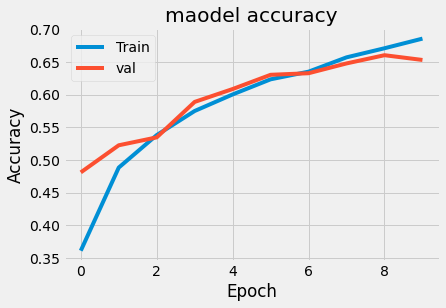

In [16]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('maodel accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

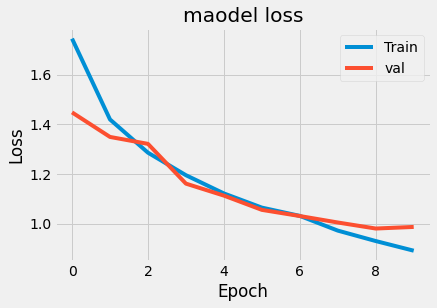

In [17]:
# Visualization of model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('maodel loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper right')
plt.show()

In [18]:
# testing model with example
from google.colab import files
uploaded = files.upload()

Saving truck.jpg to truck.jpg


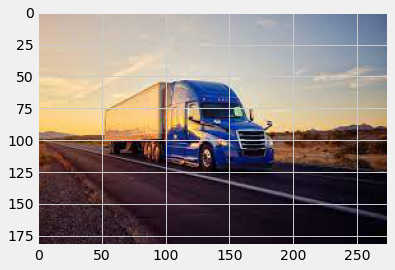

In [19]:
# Show the image
test_img = plt.imread('truck.jpg')
img = plt.imshow(test_img)

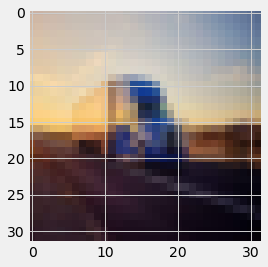

In [20]:
# Resize the image
from skimage.transform import resize
resized_img = resize(test_img, (32,32,3))
img = plt.imshow(resized_img)

In [21]:
# Get the prediction
predictions = model.predict(np.array([resized_img]))
predictions

array([[6.01128757e-01, 9.58096832e-02, 1.94032006e-02, 9.92654078e-03,
        1.27090060e-03, 2.18266970e-03, 1.69349369e-04, 9.90750152e-04,
        1.45076141e-01, 1.24042064e-01]], dtype=float32)

In [22]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] >  x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
    print(list_index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 0, 2, 3, 4, 5, 6, 7, 8, 9]
[2, 0, 1, 3, 4, 5, 6, 7, 8, 9]
[3, 0, 1, 2, 4, 5, 6, 7, 8, 9]
[4, 0, 1, 2, 3, 5, 6, 7, 8, 9]
[4, 0, 1, 2, 3, 5, 6, 7, 8, 9]
[6, 0, 1, 2, 3, 5, 4, 7, 8, 9]
[6, 0, 1, 2, 3, 5, 4, 7, 8, 9]
[6, 0, 1, 2, 3, 5, 4, 7, 8, 9]
[6, 0, 1, 2, 3, 5, 4, 7, 8, 9]
[0, 6, 1, 2, 3, 5, 4, 7, 8, 9]
[0, 6, 1, 2, 3, 5, 4, 7, 8, 9]
[0, 6, 1, 2, 3, 5, 4, 7, 8, 9]
[0, 6, 1, 2, 3, 5, 4, 7, 8, 9]
[0, 6, 1, 2, 3, 5, 4, 7, 8, 9]
[0, 6, 1, 2, 3, 5, 4, 7, 8, 9]
[0, 6, 1, 2, 3, 5, 4, 7, 8, 9]
[0, 6, 1, 2, 3, 5, 4, 7, 8, 9]
[0, 6, 1, 2, 3, 5, 4, 7, 8, 9]
[0, 6, 1, 2, 3, 5, 4, 7, 8, 9]
[0, 6, 1, 2, 3, 5, 4, 7, 8, 9]
[0, 1, 6, 2, 3, 5, 4, 7, 8, 9]
[0, 1, 6, 2, 3, 5, 4, 7, 8, 9]
[0, 1, 6, 2, 3, 5, 4, 7, 8, 9]
[0, 1, 6, 2, 3, 5, 4, 7, 8, 9]
[0, 1, 6, 2, 3, 5, 4, 7, 8, 9]
[0, 1, 6, 2, 3, 5, 4, 7, 8, 9]
[0, 1, 6, 2, 3, 5, 4, 7, 8, 9]
[0, 1, 6, 2, 3, 5, 4, 7, 8, 9]
[0, 1, 6, 2, 3, 5, 4, 7, 8, 9]
[0, 1, 6, 2, 3, 5, 4, 7, 8, 9]
[0, 1, 6, 2, 3, 5, 4, 7, 8, 9]
[0, 1, 2

In [23]:
# print first 5 predictions
for i in range (5):
  print(classification[list_index[i]], '--',predictions[0][list_index[i]] * 100, '%')

airplane -- 60.11287569999695 %
ship -- 14.507614076137543 %
truck -- 12.404206395149231 %
automobile -- 9.58096832036972 %
bird -- 1.9403200596570969 %
